<a href="https://colab.research.google.com/github/minhtri1610/deeplearning/blob/main/24112023_cnn_cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pandas as pd

In [2]:
!ls

sample_data


In [3]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2023-11-24 08:29:25--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.209.109.125, 2600:1417:76:792::317f, 2600:1417:76:796::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.209.109.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M  58.7MB/s    in 7.6s    

2023-11-24 08:29:33 (104 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [4]:
!unzip "/content/kagglecatsanddogs_5340.zip"

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

In [5]:
LIST_OF_LABELS = "cat,dog".split(',')
HEIGHT = 300
WIDTH = 300
NUM_CHANNELS = 3
NCLASSES = len(LIST_OF_LABELS)
BATCH_SIZE = 32

In [6]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

Create the csv containing the file names

In [7]:
train_file_list, train_category_list, test_file_list, test_category_list = [], [], [], []

In [8]:
for i in range(11000, 12500):
  cat = './PetImages/Cat/{}.jpg'.format(i)
  dog = './PetImages/Dog/{}.jpg'.format(i)
  test_file_list.append(cat)
  test_category_list.append(0)
  test_file_list.append(dog)
  test_category_list.append(1)
test_file_df = pd.DataFrame({'filename': test_file_list, 'class': test_category_list})

test_file_df.head()

,filename,class
0,./PetImages/Cat/11000.jpg,0
1,./PetImages/Dog/11000.jpg,1
2,./PetImages/Cat/11001.jpg,0
3,./PetImages/Dog/11001.jpg,1
4,./PetImages/Cat/11002.jpg,0


In [9]:
# train
for i in range(20):
  cat = './PetImages/Cat/{}.jpg'.format(i)
  dog = './PetImages/Dog/{}.jpg'.format(i)
  train_file_list.append(cat)
  train_category_list.append(0)
  train_file_list.append(dog)
  train_category_list.append(1)
train_file_df = pd.DataFrame({'filename': train_file_list, 'class': train_category_list})

In [10]:
train_file_df.head()

,filename,class
0,./PetImages/Cat/0.jpg,0
1,./PetImages/Dog/0.jpg,1
2,./PetImages/Cat/1.jpg,0
3,./PetImages/Dog/1.jpg,1
4,./PetImages/Cat/2.jpg,0


In [11]:
img = tf.io.read_file(test_file_df['filename'][0])
img

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x01L\x01\xf4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x01\x04\x05\x00\x06\x07\xff\xc4\x00=\x10\x00\x01\x04\x01\x03\x02\x04\x03\x06\x06\x01\x03\x04\x03\x01\x00\x01\x00\x02\x03\x11!\x04\x121AQ\x05\x13"aq\x81\x91\x06\x142\xa1\xb1\xc1#BR\xd1\xe1\xf0b\x153\xf1$Cr\x92\x074\x82\x16\xff\xc4\x00\x19\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x02\x03\x04\x05\xff\xc4\x00\x1f\x11\x01\x01\x01\x01\x00\x03\x00\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x01\x11\x02\x12!1

In [12]:
img = tf.image.decode_jpeg(img, channels=3)
img

<tf.Tensor: shape=(332, 500, 3), dtype=uint8, numpy=
array([[[135, 115,  80],
        [137, 117,  82],
        [138, 118,  83],
        ...,
        [136, 106,  70],
        [134, 104,  68],
        [134, 104,  68]],

       [[135, 115,  80],
        [137, 117,  82],
        [138, 118,  83],
        ...,
        [138, 108,  72],
        [136, 106,  70],
        [135, 105,  69]],

       [[135, 115,  80],
        [137, 117,  82],
        [138, 118,  83],
        ...,
        [139, 109,  73],
        [137, 107,  71],
        [136, 106,  70]],

       ...,

       [[ 72,  72,  64],
        [ 70,  70,  62],
        [ 70,  70,  62],
        ...,
        [161, 147, 112],
        [161, 147, 112],
        [161, 147, 112]],

       [[ 68,  67,  62],
        [ 67,  66,  61],
        [ 66,  65,  60],
        ...,
        [161, 147, 112],
        [161, 147, 112],
        [161, 147, 112]],

       [[ 65,  64,  59],
        [ 64,  63,  58],
        [ 63,  62,  57],
        ...,
        [161, 147, 11

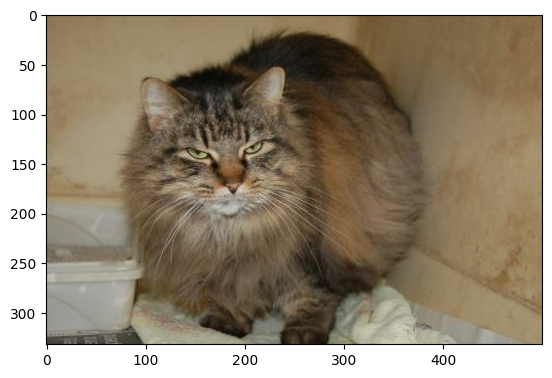

In [13]:
import matplotlib.pyplot as plt
plt.imshow(img)

Function to read in data

In [14]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=NUM_CHANNELS)
  image = tf.image.resize(image, [HEIGHT, WIDTH])
  image /= 225.0
  return image


def load_and_preprocess_image(path):
  image = tf.io.read_file(path)
  return preprocess_image(image)

In [15]:
path_ds = tf.data.Dataset.from_tensor_slices(train_file_list)

In [16]:
path_ds

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [17]:
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

In [18]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(train_category_list, tf.int64))

In [19]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [20]:
ds = image_label_ds.shuffle(buffer_size = 1000* BATCH_SIZE)
ds= ds.repeat()
ds = ds.batch(BATCH_SIZE)

ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

Build Model

In [22]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(HEIGHT, WIDTH, NUM_CHANNELS)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 149, 149, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 flatten_1 (Flatten)         (None, 1382976)           0         
                                                                 
 dense_2 (Dense)             (None, 64)                88510528  
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                      

Compile

In [23]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train

In [25]:
cnn_model.fit(ds, epochs=20, steps_per_epoch=20)

Epoch 1/20
20/20 [==============================] - 3s 122ms/step - loss: 3.3047e-05 - accuracy: 1.0000
Epoch 2/20
20/20 [==============================] - 2s 126ms/step - loss: 7.6552e-06 - accuracy: 1.0000
Epoch 3/20
20/20 [==============================] - 2s 95ms/step - loss: 4.3308e-06 - accuracy: 1.0000
Epoch 4/20
20/20 [==============================] - 2s 95ms/step - loss: 3.4872e-06 - accuracy: 1.0000
Epoch 5/20
20/20 [==============================] - 2s 94ms/step - loss: 2.9797e-06 - accuracy: 1.0000
Epoch 6/20
20/20 [==============================] - 2s 93ms/step - loss: 2.5993e-06 - accuracy: 1.0000
Epoch 7/20
20/20 [==============================] - 2s 94ms/step - loss: 2.2884e-06 - accuracy: 1.0000
Epoch 8/20
20/20 [==============================] - 2s 124ms/step - loss: 2.0368e-06 - accuracy: 1.0000
Epoch 9/20
20/20 [==============================] - 2s 113ms/step - loss: 1.8287e-06 - accuracy: 1.0000
Epoch 10/20
20/20 [==============================] - 2s 97ms/step - l